In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

In [2]:
jobs=pd.read_csv(r'C:\Users\dasav\Untitled Folder\datasets\Job_Placement_Data.csv')

In [3]:
jobs.head(10)

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed
5,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed
6,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed
7,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed
8,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed
9,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed


In [4]:
jobs.tail(10)

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
205,M,61.00,Others,62.0,Others,Commerce,65.0,Comm&Mgmt,No,62.00,Mkt&Fin,56.81,Placed
206,M,41.00,Central,42.0,Central,Science,60.0,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,Not Placed
207,M,83.33,Central,78.0,Others,Commerce,61.0,Comm&Mgmt,Yes,88.56,Mkt&Fin,71.55,Placed
208,F,43.00,Central,60.0,Others,Science,65.0,Comm&Mgmt,No,92.66,Mkt&HR,62.92,Not Placed
209,M,62.00,Central,72.0,Central,Commerce,65.0,Comm&Mgmt,No,67.00,Mkt&Fin,56.49,Placed
210,M,80.60,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.00,Mkt&Fin,74.49,Placed
211,M,58.00,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.00,Mkt&Fin,53.62,Placed
212,M,67.00,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.00,Mkt&Fin,69.72,Placed
213,F,74.00,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.00,Mkt&HR,60.23,Placed
214,M,62.00,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.00,Mkt&HR,60.22,Not Placed


In [6]:
jobs.shape

(215, 13)

In [7]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


In [8]:
#finding any null values in dataset
jobs.isna().sum()

gender                 0
ssc_percentage         0
ssc_board              0
hsc_percentage         0
hsc_board              0
hsc_subject            0
degree_percentage      0
undergrad_degree       0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64

In [9]:
jobs.corr()

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent
ssc_percentage,1.000000,0.511472,0.538404,0.261993,0.388478
hsc_percentage,0.511472,1.000000,0.434206,0.245113,0.354823
degree_percentage,0.538404,0.434206,1.000000,0.224470,0.402364
emp_test_percentage,0.261993,0.245113,0.224470,1.000000,0.218055
mba_percent,0.388478,0.354823,0.402364,0.218055,1.000000


In [10]:
jobs.describe()

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186
std,10.827205,10.897509,7.358743,13.275956,5.833385
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,60.600000,60.900000,61.000000,60.000000,57.945000
50%,67.000000,65.000000,66.000000,71.000000,62.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000
max,89.400000,97.700000,91.000000,98.000000,77.890000


In [11]:
# checking duplicates
jobs.duplicated().sum()

0

In [12]:
#checking dtypes
jobs.dtypes

gender                  object
ssc_percentage         float64
ssc_board               object
hsc_percentage         float64
hsc_board               object
hsc_subject             object
degree_percentage      float64
undergrad_degree        object
work_experience         object
emp_test_percentage    float64
specialisation          object
mba_percent            float64
status                  object
dtype: object

# EDA 

array([[<AxesSubplot:title={'center':'ssc_percentage'}>,
        <AxesSubplot:title={'center':'hsc_percentage'}>],
       [<AxesSubplot:title={'center':'degree_percentage'}>,
        <AxesSubplot:title={'center':'emp_test_percentage'}>],
       [<AxesSubplot:title={'center':'mba_percent'}>, <AxesSubplot:>]],
      dtype=object)

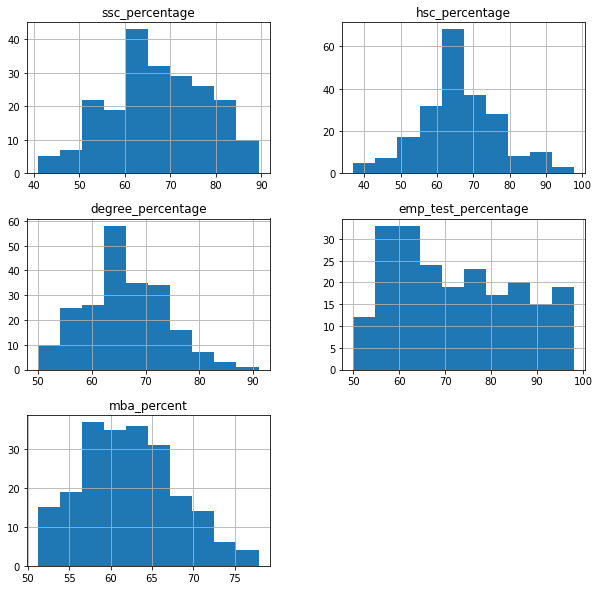

In [13]:
# ploting histogram 

jobs.hist(figsize=(10,10))


<AxesSubplot:>

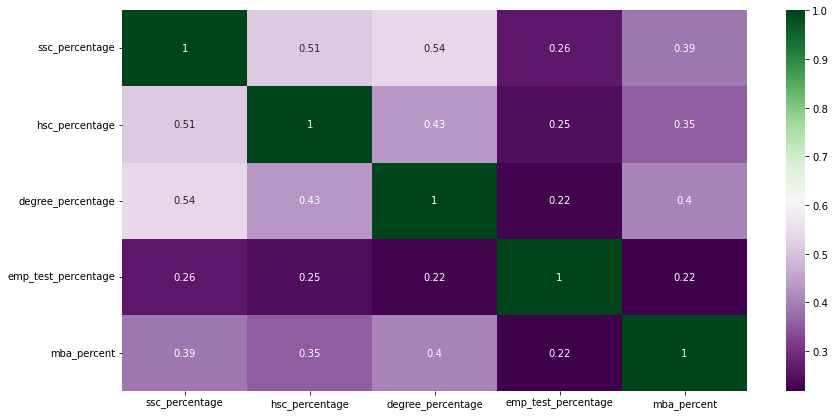

In [14]:
#finding correlation between variables

correlation = jobs.corr()
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'PRGn')

<AxesSubplot:title={'center':'status'}, xlabel='status', ylabel='count'>

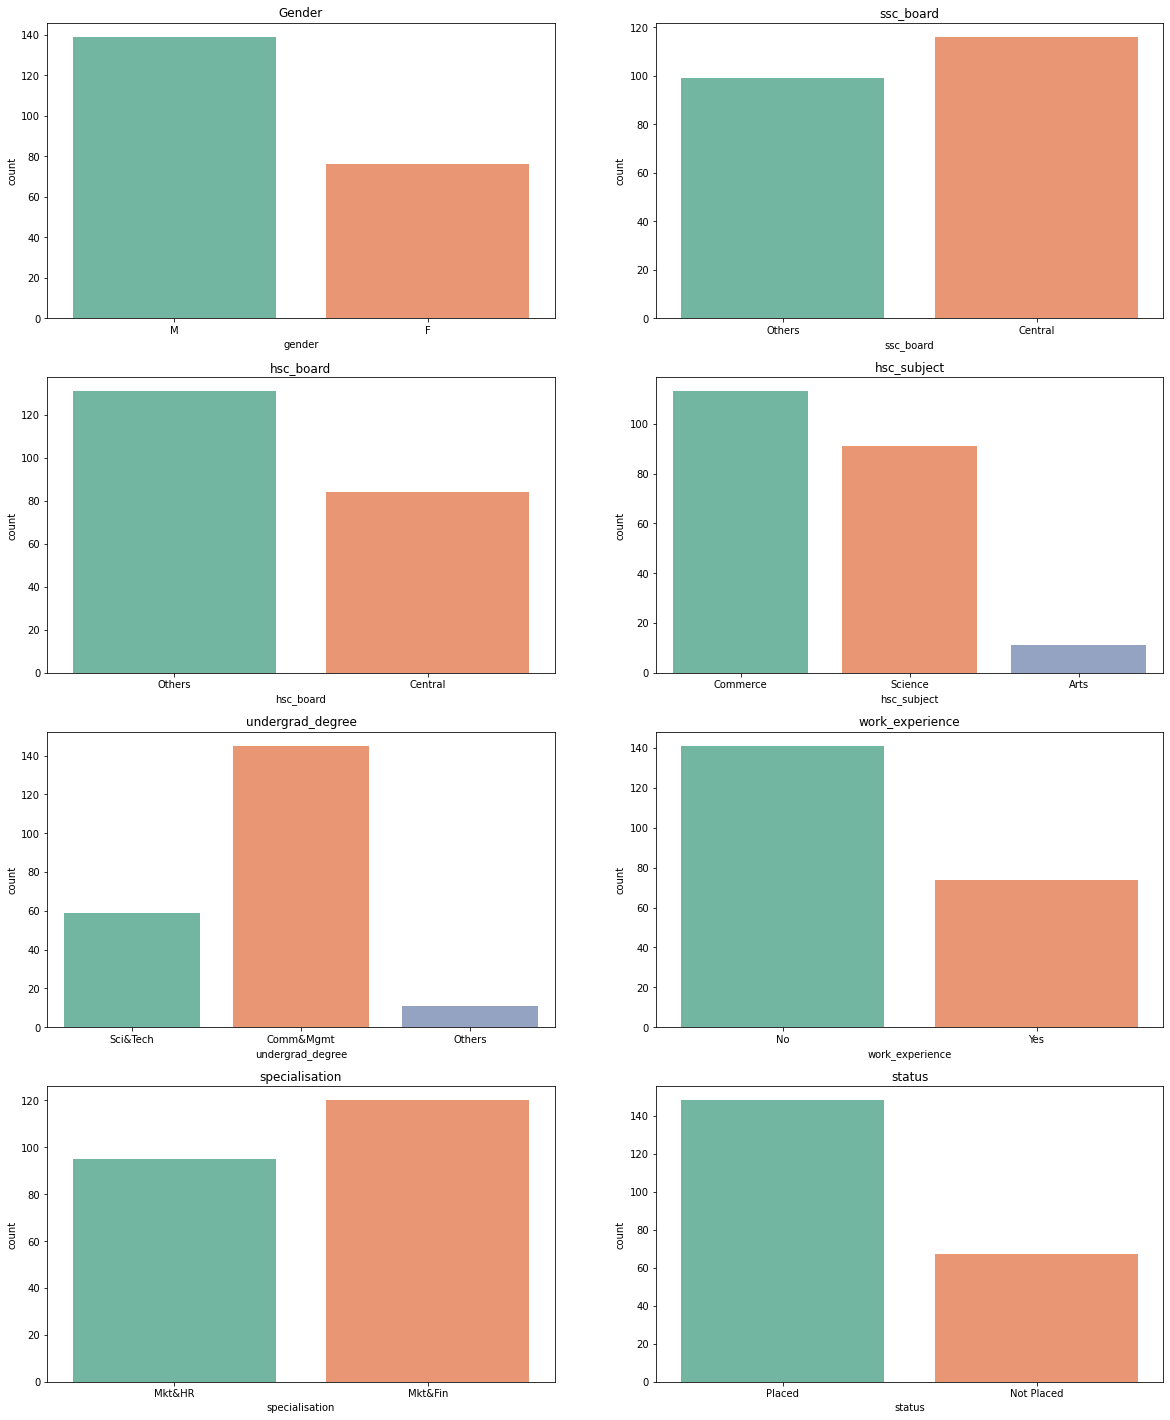

In [15]:
# countplot 

plt.figure(figsize = (20,25))

plt.subplot(4,2,1)
plt.gca().set_title('Gender')
sns.countplot(x = 'gender', palette = 'Set2', data = jobs)

plt.subplot(4,2,2)
plt.gca().set_title('ssc_board')
sns.countplot(x = 'ssc_board', palette = 'Set2', data = jobs)

plt.subplot(4,2,3)
plt.gca().set_title('hsc_board')
sns.countplot(x = 'hsc_board', palette = 'Set2', data = jobs)

plt.subplot(4,2,4)
plt.gca().set_title('hsc_subject')
sns.countplot(x = 'hsc_subject', palette = 'Set2', data = jobs)

plt.subplot(4,2,5)
plt.gca().set_title('undergrad_degree')
sns.countplot(x = 'undergrad_degree', palette = 'Set2', data =jobs)

plt.subplot(4,2,6)
plt.gca().set_title('work_experience')
sns.countplot(x = 'work_experience', palette = 'Set2', data = jobs)

plt.subplot(4,2,7)
plt.gca().set_title('specialisation')
sns.countplot(x = 'specialisation', palette = 'Set2', data = jobs)

plt.subplot(4,2,8)
plt.gca().set_title('status')
sns.countplot(x = 'status', palette = 'Set2', data = jobs)

<AxesSubplot:title={'center':'ssc_percentage'}, xlabel='ssc_percentage'>

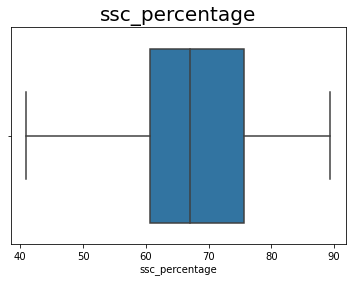

In [16]:
# box plot

plt.title("ssc_percentage", fontdict = {'fontsize': 20})
sns.boxplot(x=jobs["ssc_percentage"])

<AxesSubplot:title={'center':' hsc_percentage'}, xlabel='hsc_percentage'>

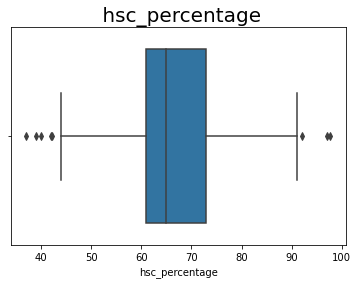

In [17]:
plt.title(" hsc_percentage", fontdict = {'fontsize': 20})
sns.boxplot(x=jobs["hsc_percentage"])

<AxesSubplot:title={'center':' degree_percentage'}, xlabel='degree_percentage'>

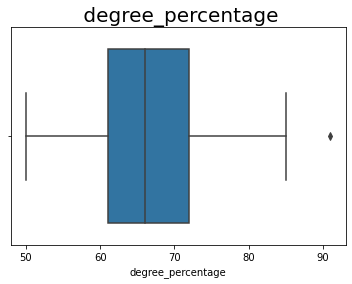

In [18]:
plt.title(" degree_percentage", fontdict = {'fontsize': 20})
sns.boxplot(x=jobs["degree_percentage"])

<AxesSubplot:title={'center':'emp_test_percentage'}, xlabel='emp_test_percentage'>

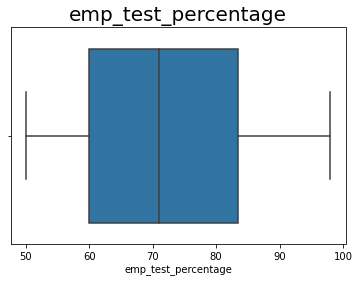

In [19]:
plt.title("emp_test_percentage", fontdict = {'fontsize': 20})
sns.boxplot(x=jobs["emp_test_percentage"])

<AxesSubplot:title={'center':' mba_percent'}, xlabel='mba_percent'>

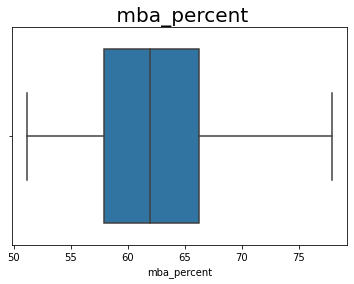

In [20]:
plt.title(" mba_percent", fontdict = {'fontsize': 20})
sns.boxplot(x=jobs["mba_percent"])

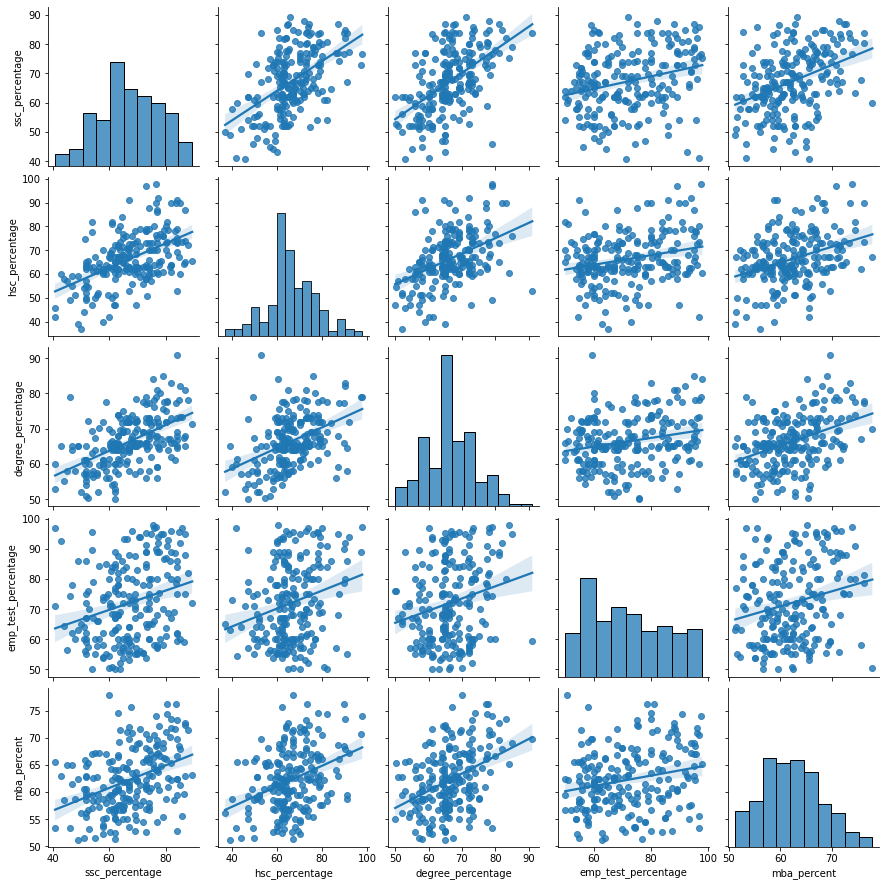

In [21]:
sns.pairplot(jobs, kind='reg')

# model building

In [22]:
# splitting the data into dependent and independent variables


x = jobs.select_dtypes('float')
y= jobs['status']

In [23]:
x.head(10)

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent
0,67.00,91.00,58.00,55.00,58.80
1,79.33,78.33,77.48,86.50,66.28
2,65.00,68.00,64.00,75.00,57.80
3,56.00,52.00,52.00,66.00,59.43
4,85.80,73.60,73.30,96.80,55.50
5,55.00,49.80,67.25,55.00,51.58
6,46.00,49.20,79.00,74.28,53.29
7,82.00,64.00,66.00,67.00,62.14
8,73.00,79.00,72.00,91.34,61.29
9,58.00,70.00,61.00,54.00,52.21


In [24]:
y.head(10)

0        Placed
1        Placed
2        Placed
3    Not Placed
4        Placed
5    Not Placed
6    Not Placed
7        Placed
8        Placed
9    Not Placed
Name: status, dtype: object

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=7, random_state=1)
clf.fit(x_train, y_train)
pred_value = clf.predict(x_test)

In [30]:
y_test.head(10)

200        Placed
212        Placed
138        Placed
176        Placed
15         Placed
111    Not Placed
168    Not Placed
73         Placed
204        Placed
139        Placed
Name: status, dtype: object

In [32]:
pred_value 

array(['Placed', 'Placed', 'Placed', 'Placed', 'Placed', 'Not Placed',
       'Not Placed', 'Placed', 'Placed', 'Placed', 'Placed', 'Placed',
       'Not Placed', 'Placed', 'Placed', 'Placed', 'Placed', 'Placed',
       'Not Placed', 'Placed', 'Placed', 'Placed', 'Placed', 'Not Placed',
       'Placed', 'Placed', 'Not Placed', 'Placed', 'Placed', 'Placed',
       'Placed', 'Placed', 'Placed', 'Placed', 'Placed', 'Placed',
       'Placed', 'Placed', 'Placed', 'Placed', 'Placed', 'Placed',
       'Placed'], dtype=object)

In [34]:
score = accuracy_score(y_test, pred_value )
print(score)

0.813953488372093
